In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [11]:
# read data



def read_data_set(set_path,set_name):
    file_path = os.path.join(set_path,set_name)
    set_data = pd.read_csv(file_path,header=0,index_col=0)
    return set_data

set_path = './Epileptic Seizure Recognition Data Set/OriginalData'
set_names= ['Zset.csv','Oset.csv','Nset.csv','Fset.csv','Sset.csv']

#set_names= ['Zset.csv','Oset.csv']

set_dfs=[]
for set_name in set_names:
    set_dfs.append(read_data_set(set_path,set_name))

# Zset_df = read_data_set(set_path,'Zset.csv')
# Oset_df = read_data_set(set_path,'Oset.csv')



In [12]:
Zset_df = set_dfs[0]
Zset_df.head()

,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009,Z010,...,Z091,Z092,Z093,Z094,Z095,Z096,Z097,Z098,Z099,Z100
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,13,40,-19,-45,6,-133,-3,-51,56,-36
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,30,48,-1,-62,-6,-144,-3,-42,55,-71
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,42,35,33,-76,-8,-113,-12,-39,38,-120
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,56,5,51,-98,-6,-74,-24,-47,-5,-150
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,56,-40,49,-108,15,-41,-34,-51,-47,-160


In [4]:
# for previw we choose the column which has the maximun std in the dataset for the representative
# get the column which has the maxmium std
def get_max_std_col(df):
    
    max_std_col_name = df.std().idxmax()
    return df[max_std_col_name]

rep_series = []

for set_df in set_dfs:
    rep_series.append(get_max_std_col(set_df))

Z_rep = rep_series[0]

In [5]:
type(Z_rep)

pandas.core.series.Series

In [6]:
def series_boxplot(ax,rep_series):
    ax.grid(b=True,which='major',axis='y',linestyle='--')
    out = ax.boxplot(rep_series.values)
    return out

In [7]:
def series_plot(ax,rep_series):

    ax.set_xlim(left=0,right=4100)
    ax.grid(b=True,which='major',axis='y',linestyle='--')
    
    # Annotation
    offset = 5
    max_point_x, max_point_y = rep_series.idxmax(), rep_series.max()
    min_point_x, min_point_y = rep_series.idxmin(), rep_series.min()
    max_annotation_str = 'Max P\nx:{:d}, y:{:d}'.format(max_point_x,max_point_y)
    min_annotation_str = 'Min P\nx:{:d}, y:{:d}'.format(min_point_x,min_point_y)
    ax.annotate(max_annotation_str,xy=(max_point_x,max_point_y),xytext=(offset,-2*offset),textcoords='offset points')
    ax.annotate(min_annotation_str,xy=(min_point_x,min_point_y),xytext=(offset,0),textcoords='offset points')
  
    # Title
    mu = rep_series.mean()
    sigma = rep_series.std()
    title = r'{}: $\mu = {:.2f}$, $\sigma = {:.2f}$'.format(rep_series.name,mu,sigma)
    ax.set_title(title,loc='left')

    out = ax.plot(rep_series.index,rep_series.values,linewidth=0.4,color='k')
    return out


In [8]:
def series_histplot(ax,rep_series):
    ax.grid(b=True,which='major',axis='y',linestyle='--')
    
    out = ax.hist(rep_series.values,bins = 50,orientation='horizontal',color='0.5')
    return out

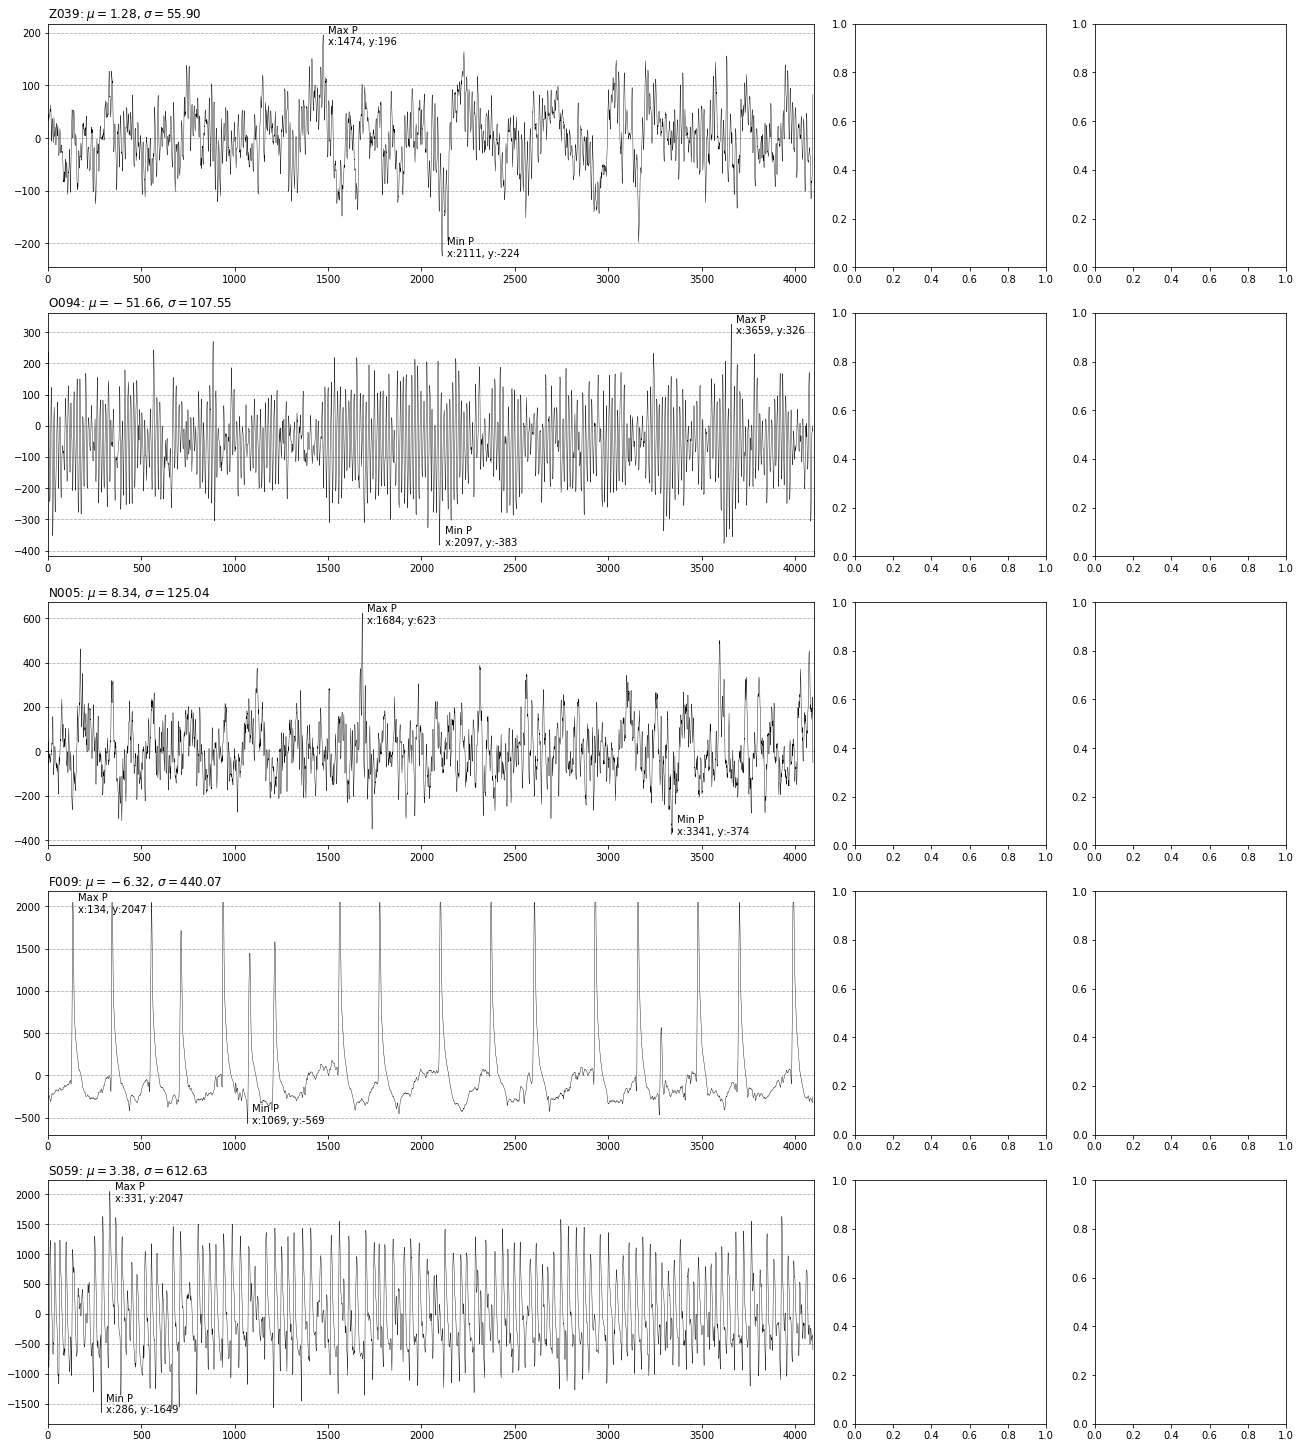

In [10]:
# Grid Axes
widths = [4,1,1]
heights = [1,1,1,1,1] 
# heights =[1,1]
gs_kw = dict(width_ratios=widths,height_ratios=heights)
fig,axes = plt.subplots(nrows=5,ncols=3,figsize=[18,20],constrained_layout=True,gridspec_kw = gs_kw)


# Plot
for i in range(len(rep_series)):
    
    series_plot(axes[i,0],rep_series[i])
#     series_boxplot(axes[i,1],rep_series[i])

#     series_histplot(axes[i,2],rep_series[i])

plt.show()
